# Covariance Matrix

A | B
- | -
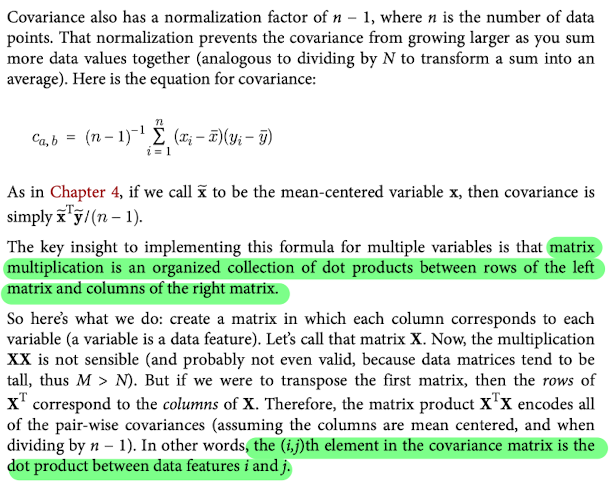|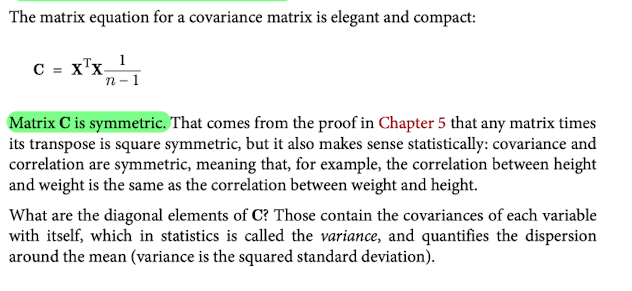

## Input Data

In [27]:
import pandas as pd

# read the data into a pandas dataframe
url  = 'https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
data = pd.read_csv(url,sep=',',header=None)

# attach column labels (don't worry, I didn't type this all in by hand, lol)
data.columns = [ 'state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite',
'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage',
'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap',
'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy',
'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup',
'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc',
'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian',
'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85',
'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop',
'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea',
'PopDens', 'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop',
 ]

# have a look at the data
data

state county community        communityname  fold  population  \
0         8      ?         ?         Lakewoodcity     1        0.19   
1        53      ?         ?          Tukwilacity     1        0.00   
2        24      ?         ?         Aberdeentown     1        0.00   
3        34      5     81440  Willingborotownship     1        0.04   
4        42     95      6096    Bethlehemtownship     1        0.01   
...     ...    ...       ...                  ...   ...         ...   
1989     12      ?         ?    TempleTerracecity    10        0.01   
1990      6      ?         ?          Seasidecity    10        0.05   
1991      9      9     80070        Waterburytown    10        0.16   
1992     25     17     72600          Walthamcity    10        0.08   
1993      6      ?         ?          Ontariocity    10        0.20   

      householdsize  racepctblack  racePctWhite  racePctAsian  ...  LandArea  \
0              0.33          0.02          0.90          0.12  ...      0.12   
1              0.16          0.12          0.74          0.45  ...      0.02   
2              0.42          0.49          0.56          0.17  ...      0.01   
3              0.77          1.00          0.08          0.12  ...      0.02   
4              0.55          0.02          0.95          0.09  ...      0.04   
...             ...           ...           ...           ...  ...       ...   
1989           0.40          0.10          0.87          0.12  ...      0.01   
1990           0.96          0.46          0.28          0.83  ...      0.02   
1991           0.37          0.25          0.69          0.04  ...      0.08   
1992           0.51          0.06          0.87          0.22  ...      0.03   
1993           0.78          0.14          0.46          0.24  ...      0.11   

      PopDens  PctUsePubTrans  PolicCars  PolicOperBudg  LemasPctPolicOnPatr  \
0        0.26            0.20       0.06           0.04                  0.9   
1        0.12            0.45          ?              ?                    ?   
2        0.21            0.02          ?              ?                    ?   
3        0.39            0.28          ?              ?                    ?   
4        0.09            0.02          ?              ?                    ?   
...       ...             ...        ...            ...                  ...   
1989     0.28            0.05          ?              ?                    ?   
1990     0.37            0.20          ?              ?                    ?   
1991     0.32            0.18       0.08           0.06                 0.78   
1992     0.38            0.33       0.02           0.02                 0.79   
1993     0.30            0.05       0.08           0.04                 0.73   

      LemasGangUnitDeploy  LemasPctOfficDrugUn  PolicBudgPerPop  \
0                     0.5                 0.32             0.14   
1                       ?                 0.00                ?   
2                       ?                 0.00                ?   
3                       ?                 0.00                ?   
4                       ?                 0.00                ?   
...                   ...                  ...              ...   
1989                    ?                 0.00                ?   
1990                    ?                 0.00                ?   
1991                    0                 0.91             0.28   
1992                    0                 0.22             0.18   
1993                  0.5                 1.00             0.13   

      ViolentCrimesPerPop  
0                    0.20  
1                    0.67  
2                    0.43  
3                    0.12  
4                    0.03  
...                   ...  
1989                 0.09  
1990                 0.45  
1991                 0.23  
1992                 0.19  
1993                 0.48  

[1994 rows x 128 columns]

In [28]:
import numpy as np

# extract only the numeric data
numberDataset = data._get_numeric_data()

# drop a few additional columns, and convert to a numpy array
dataMat = numberDataset.drop(['state','fold'],axis=1).values
dataMat.shape, dataMat, np.max(dataMat)

#Save to never lookup internet files anymore
np.save('communities-numeric.npy', dataMat)

## Covariance by hand 

In [29]:
# Taking the first two rows from the dataset and computing the covariance

import numpy as np

dataMat = np.load('communities-numeric.npy')

f1 = dataMat[:,0]
var_f1 = np.sum((f1-np.mean(f1))**2)/(len(f1))
print(f1, f1.shape, var_f1, np.var(f1))

f2 = dataMat[:,1]
var_f2 = np.sum((f2-np.mean(f2))**2)/(len(f2))
print(f2, f2.shape, var_f2, np.var(f2))

cov_f1_f2 = np.sum((f1 - np.mean(f1))*(f2 - np.mean(f2)))/(len(f1)-1)


cov_f1_f2, np.cov(f1, f2)

[0.19 0.   0.   ... 0.16 0.08 0.2 ] (1994,) 0.016097013709131407 0.016097013709131407
[0.33 0.16 0.42 ... 0.37 0.51 0.78] (1994,) 0.026789726476319633 0.026789726476319633


(-0.0009588073804957272,
 array([[ 0.01610509, -0.00095881],
        [-0.00095881,  0.02680317]]))

## The formula

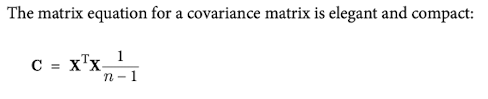

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# compute the mean of each data feature
datamean = np.mean(dataMat,axis=0)

# mean-center the data using broadcasting
dataMatM = dataMat - datamean

# Now to compute the covariance matrix
covMat = dataMatM.T @ dataMatM  # data matrix times its transpose
covMat /= (dataMatM.shape[0]-1) # divide by N-1

#Check covariance with the one made by hand
print(covMat[0,1], covMat[1,0])

-0.0009588073804957274 -0.0009588073804957274


clim-> 0.0395712834841705


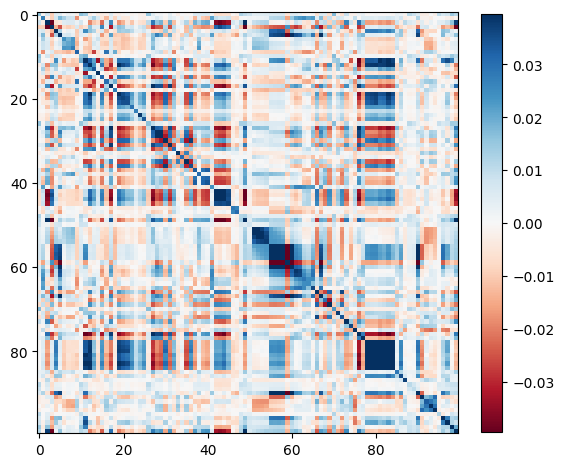

(0.04360791431465912,
 array([0.01610509, 0.02680317, 0.06423288, 0.05955522, 0.04362979,
        0.05405235, 0.02408571, 0.02061048, 0.02772377, 0.03210744,
        0.01644964, 0.19785642, 0.04383266, 0.0334571 , 0.0416599 ,
        0.03170914, 0.03014342, 0.04934474, 0.02807761, 0.03930574,
        0.03652247, 0.03489579, 0.0294443 , 0.02715093, 0.03818541,
        0.03351851, 0.01636886, 0.05220043, 0.0455223 , 0.04100948,
        0.04376177, 0.04087323, 0.03028866, 0.04096008, 0.03078514,
        0.03957   , 0.03470463, 0.03329178, 0.03077825, 0.03068445,
        0.03371139, 0.02389934, 0.04079439, 0.04258176, 0.04785127,
        0.03667492, 0.02842986, 0.03070956, 0.01180939, 0.05287521,
        0.007602  , 0.04799975, 0.04448903, 0.04060146, 0.03801321,
        0.05559764, 0.05585328, 0.05604533, 0.05514153, 0.05146956,
        0.04827517, 0.03863868, 0.03636978, 0.02874766, 0.02493999,
        0.03583483, 0.03884332, 0.04408172, 0.02975905, 0.06511764,
        0.02263958, 0.0376

In [31]:
# dynamic color scaling
clim = np.max(np.abs(covMat)) * .2
print("clim->", clim)

plt.figure(figsize=(6,6))
plt.imshow(covMat,vmin=-clim,vmax=clim, cmap='RdBu')
plt.colorbar(fraction=.045)
plt.show()


np.var(dataMat[:,4]), np.diag(covMat), np.diag(covMat).shape


A|B
-|-
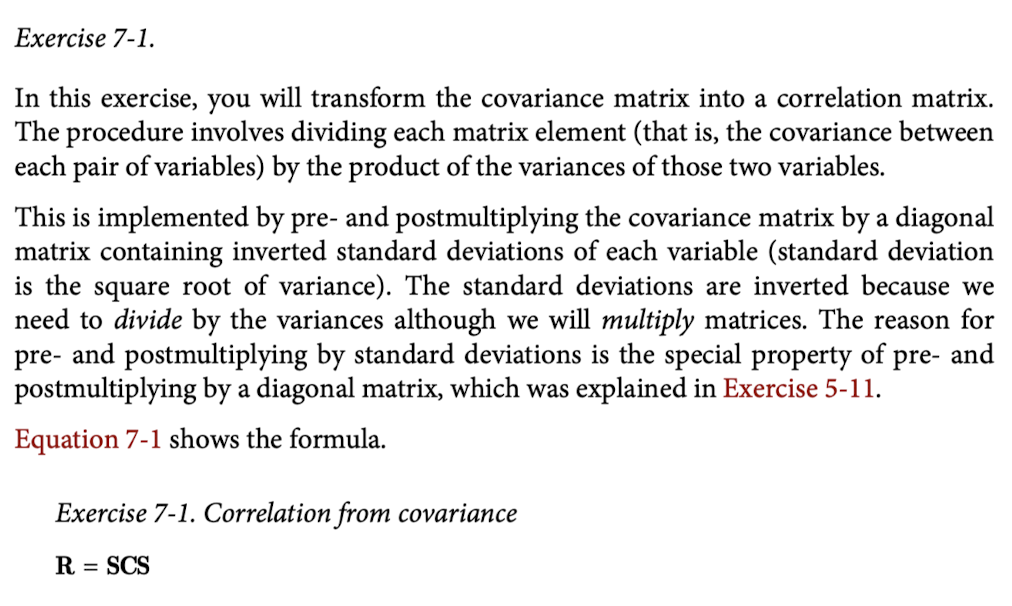| 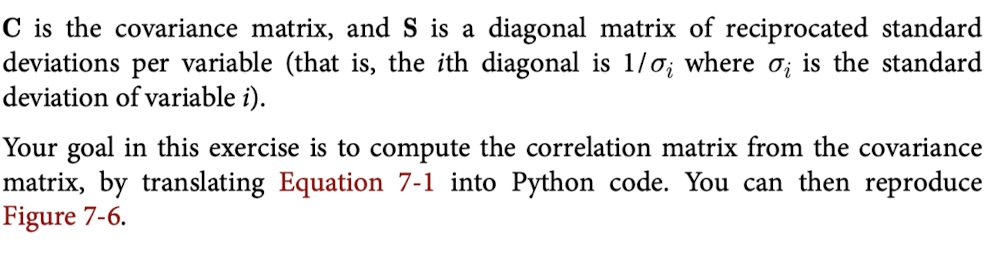

In [32]:
S = np.diag( 1/np.sqrt(np.diag(covMat)) )
corrMat = S @ covMat @ S
corrMat, corrMat.shape, corrMat[2,1], corrMat[1,2]

(array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
          0.46635229,  0.36715738],
        [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
         -0.09436752, -0.0349226 ],
        [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
          0.26079264,  0.63126363],
        ...,
        [ 0.27035553, -0.05150557,  0.14702299, ...,  1.        ,
          0.20664393,  0.15382885],
        [ 0.46635229, -0.09436752,  0.26079264, ...,  0.20664393,
          1.        ,  0.34862726],
        [ 0.36715738, -0.0349226 ,  0.63126363, ...,  0.15382885,
          0.34862726,  1.        ]]),
 (100, 100),
 -0.0671091367342837,
 -0.06710913673428372)

clim-> 0.0395712834841705


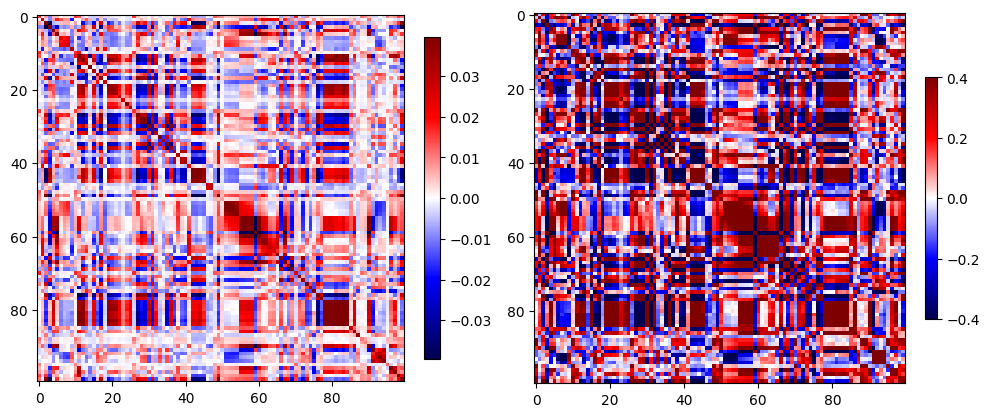

In [66]:
climCorr = np.max(np.abs(corrMat)) * .4
print("clim->", clim)

fig, [ax1, ax2] = plt.subplots(1,2, figsize=(10, 6))
im1 = ax1.imshow(covMat,vmin=-clim,vmax=clim, cmap='seismic')
im2 = ax2.imshow(corrMat,vmin=-climCorr,vmax=climCorr, cmap='seismic')

fig.colorbar(im1, ax=ax1,fraction=.04)
fig.colorbar(im2, ax=ax2,fraction=.03)
plt.tight_layout()
plt.show()

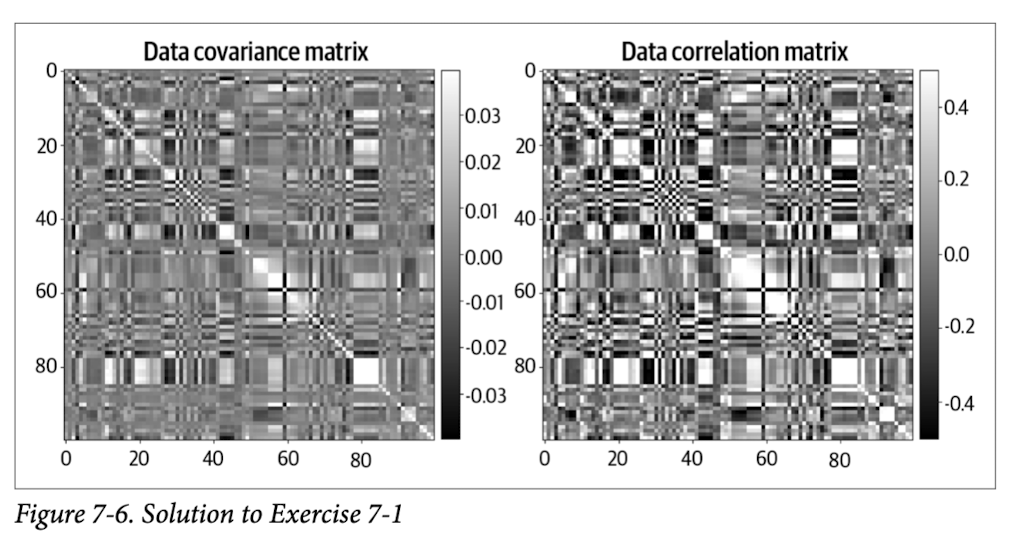

A|B
-|-
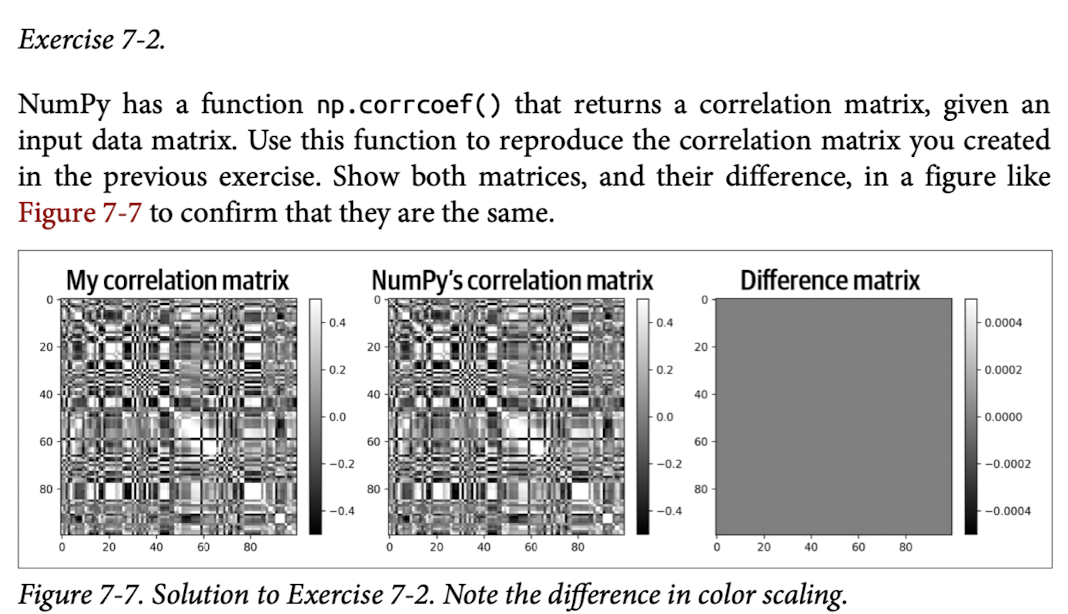 | 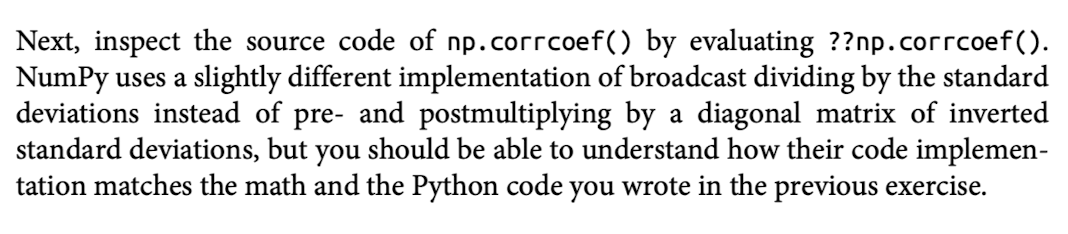

In [33]:
np.corrcoef(covMat), corrMat

(array([[ 1.        , -0.06103936,  0.6051328 , ...,  0.4104785 ,
          0.87741272,  0.73033115],
        [-0.06103936,  1.        , -0.19328917, ...,  0.04848605,
         -0.12187975, -0.03103537],
        [ 0.6051328 , -0.19328917,  1.        , ..., -0.03703036,
          0.66148919,  0.91153961],
        ...,
        [ 0.4104785 ,  0.04848605, -0.03703036, ...,  1.        ,
          0.40667459,  0.09629283],
        [ 0.87741272, -0.12187975,  0.66148919, ...,  0.40667459,
          1.        ,  0.77308892],
        [ 0.73033115, -0.03103537,  0.91153961, ...,  0.09629283,
          0.77308892,  1.        ]]),
 array([[ 1.        , -0.04614841,  0.23117774, ...,  0.27035553,
          0.46635229,  0.36715738],
        [-0.04614841,  1.        , -0.06710914, ..., -0.05150557,
         -0.09436752, -0.0349226 ],
        [ 0.23117774, -0.06710914,  1.        , ...,  0.14702299,
          0.26079264,  0.63126363],
        ...,
        [ 0.27035553, -0.05150557,  0.14702299, ...,  

clim-> 0.0395712834841705


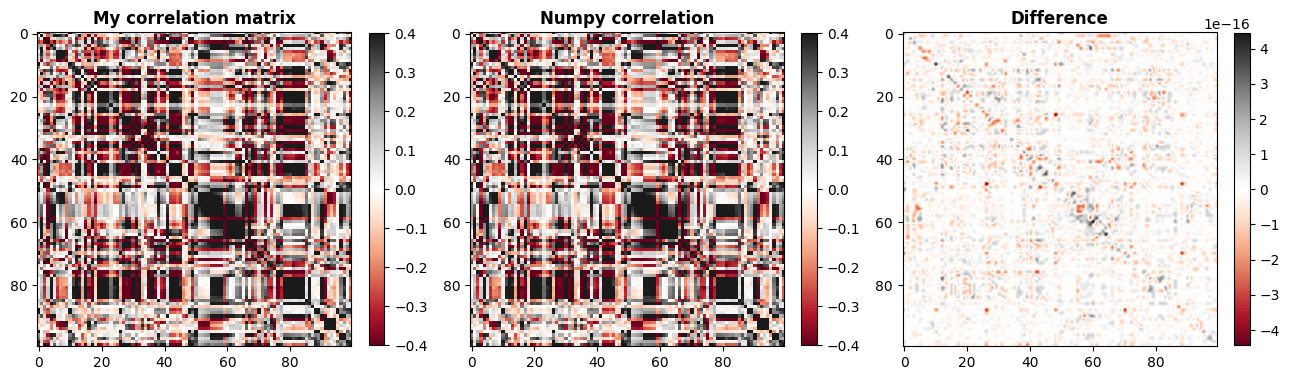

In [34]:
climCorr = np.max(np.abs(corrMat)) * .4
print("clim->", clim)

colourmap = 'RdGy'

corrMatNP = np.corrcoef(dataMat, rowvar=False)

fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(13, 8))
im1 = ax1.imshow(corrMat,vmin=-climCorr,vmax=climCorr, cmap=colourmap)
ax1.set_title('My correlation matrix',fontweight='bold')
im2 = ax2.imshow(corrMatNP,vmin=-climCorr,vmax=climCorr, cmap=colourmap)
ax2.set_title('Numpy correlation',fontweight='bold')
im3 = ax3.imshow(corrMat - corrMatNP, cmap=colourmap, interpolation='spline16')
ax3.set_title('Difference',fontweight='bold')

fig.colorbar(im1, ax=ax1,fraction=.045)
fig.colorbar(im2, ax=ax2,fraction=.045)
fig.colorbar(im3, ax=ax3,fraction=.045)
plt.tight_layout()
plt.show()

In [25]:
# This is the code from numpy to create a correlation matrix
# Given arrays x and y
'''
c = cov(x, y, rowvar, dtype=dtype)
try:
    d = diag(c)
except ValueError:
    # scalar covariance
    # nan if incorrect value (nan, inf, 0), 1 otherwise
    return c / c
stddev = sqrt(d.real)
c /= stddev[:, None]
c /= stddev[None, :]
'''

# Test

import numpy as np

m = 2
#A = np.random.randn(m,m)
A = np.arange(0,m**2,1).reshape([m,m])
c = np.cov(A)
d = np.diag(c)

print("A", A, A.shape)
print("c", c, c.shape)
print("d", d, d.shape)

stddev = np.sqrt(d)
print("stddev", stddev.shape)

first_diag = stddev[:, None]
print("first_diag", first_diag.shape)

second_diag = stddev[None, :]
print("second_diag", second_diag.shape)

div_after_index = c / first_diag
div_after_index = c / second_diag
print("div_after_index", div_after_index, div_after_index.shape)

print("cov", np.corrcoef(A))

S = np.diag( 1/np.sqrt(np.diag(A)) )
corrMat = S @ A @ S
corrMat, corrMat.shape



A [[0 1]
 [2 3]] (2, 2)
c [[0.5 0.5]
 [0.5 0.5]] (2, 2)
d [0.5 0.5] (2,)
stddev (2,)
first_diag (2, 1)
second_diag (1, 2)
div_after_index [[0.70710678 0.70710678]
 [0.70710678 0.70710678]] (2, 2)
cov [[1. 1.]
 [1. 1.]]


/var/folders/gn/p9fqt_3n0xv_1mf68p7g36l00000gn/T/ipykernel_1728/4261186715.py:45: RuntimeWarning: divide by zero encountered in divide
  S = np.diag( 1/np.sqrt(np.diag(A)) )
/var/folders/gn/p9fqt_3n0xv_1mf68p7g36l00000gn/T/ipykernel_1728/4261186715.py:46: RuntimeWarning: invalid value encountered in matmul
  corrMat = S @ A @ S


(array([[nan, nan],
        [inf,  1.]]),
 (2, 2))

In [16]:
np.arange(0,m**2,1)

array([0, 1, 2, 3])

# Image Feature Detection

A | B
- | -
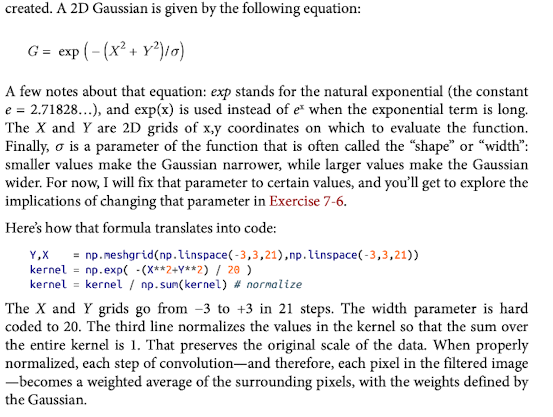| 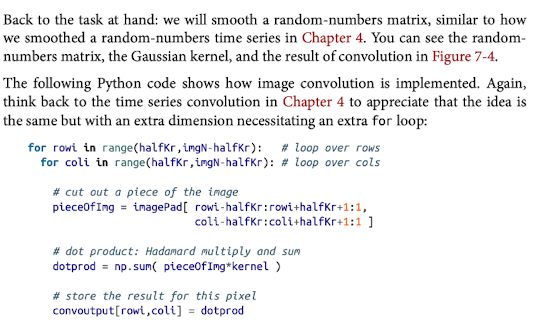

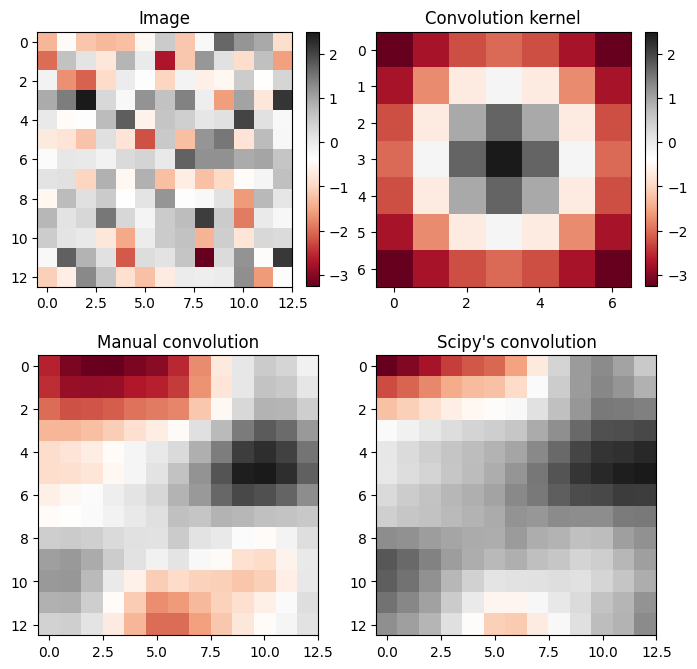

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# image
imgN  = 13
image = np.random.randn(imgN,imgN)

# convolution kernel
kernelN = 7
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/7 )
kernel  = kernel / np.sum(kernel) # normalize
     
# now for the convolution
halfKr = kernelN//2
convoutput = np.zeros((imgN+kernelN-1,imgN+kernelN-1))

imagePad = np.zeros(convoutput.shape)
imagePad[halfKr:-halfKr:1,halfKr:-halfKr:1] = image


# double for-loop over rows and columns (width and height of picture)
for rowi in range(halfKr,imgN+halfKr):
  for coli in range(halfKr,imgN+halfKr):

    # cut out a piece of the image
    pieceOfImg = imagePad[rowi-halfKr:rowi+halfKr+1:1,coli-halfKr:coli+halfKr+1:1]

    # dot product: element-wise multiply and sum
    dotprod = np.sum( pieceOfImg*kernel )

    # store the result for this pixel
    convoutput[rowi,coli] = dotprod

# trim off edges
convoutput = convoutput[halfKr:-halfKr:1,halfKr:-halfKr:1]

from scipy import signal

# using scipy
convoutput2 = signal.convolve2d(image,kernel,mode='same', boundary='symm')

colourmap = 'RdGy'

fig,ax = plt.subplots(2,2,figsize=(8,8))

im1 = ax[0,0].imshow(image, cmap=colourmap)
ax[0,0].set_title('Image')

im2 = ax[0,1].imshow(kernel, cmap=colourmap)
ax[0,1].set_title('Convolution kernel')

ax[1,0].imshow(convoutput, cmap=colourmap)
ax[1,0].set_title('Manual convolution')

fig.colorbar(im1, ax=ax[0,0],fraction=.045)
fig.colorbar(im1, ax=ax[0,1],fraction=.045)

ax[1,1].imshow(convoutput2, cmap=colourmap)
ax[1,1].set_title("Scipy's convolution")

# for i in ax.flatten(): i.axis('off')

plt.savefig('Figure_07_04b.png',dpi=300)
plt.show()

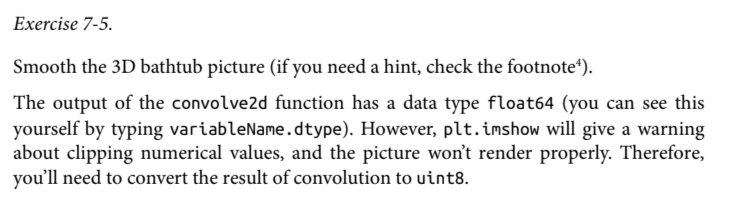

In [3]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt

# read a pic from the web
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')

# check the size
print(bathtub.shape)

(1675, 3000, 3)


In [ ]:
# let's see what the famous Bathtub Museum looks like
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub)
plt.savefig('Figure_07_05a.png',dpi=300)
plt.show()

# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = color.rgb2gray(bathtub)

# check the size again
print(bathtub2d.shape)

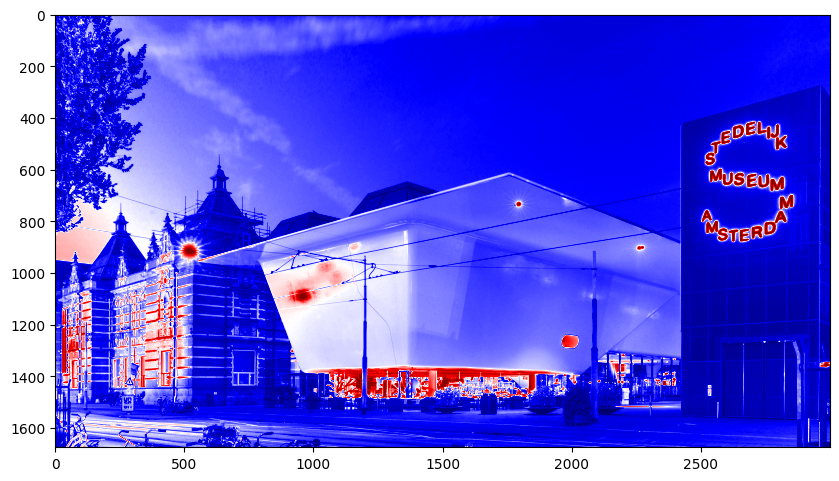

array([[0.22974431, 0.34094   , 0.32553647],
       [0.30956745, 0.26671294, 0.29584549],
       [0.30900196, 0.37342157, 0.36222235]])

In [6]:
fig = plt.figure(figsize=(10,6))
plt.imshow(bathtub2d, cmap = "seismic")
plt.savefig('Figure_07_05a.png',dpi=300)
plt.show()

bathtub2d[0:3,0:3]

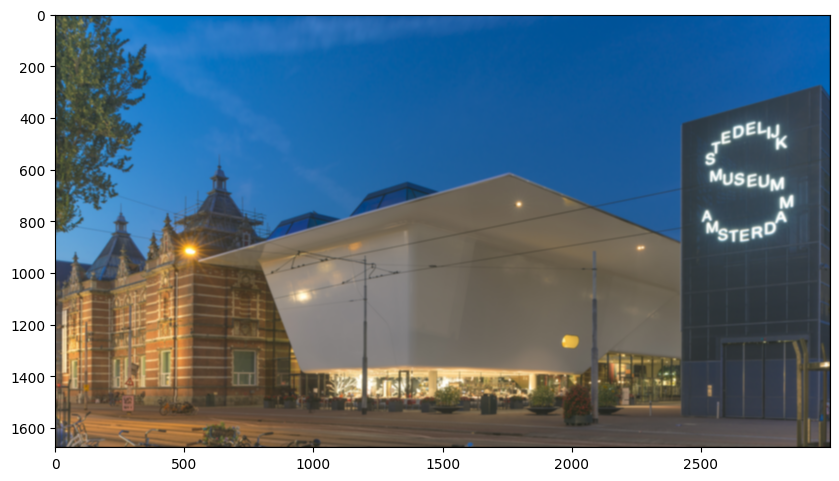

In [11]:
from scipy import signal

# convolution kernel
kernelN = 10
Y,X     = np.meshgrid(np.linspace(-3,3,kernelN),np.linspace(-3,3,kernelN))
kernel  = np.exp( -(X**2+Y**2)/10 )
kernel  = kernel / np.sum(kernel) # normalize

# initialize smoothed image
smooth_bathtub = np.zeros(bathtub.shape)

# smooth each layer individually
for i in range(smooth_bathtub.shape[2]):
  smooth_bathtub[:,:,i] = signal.convolve2d(bathtub[:,:,i],kernel,mode='same')


fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()

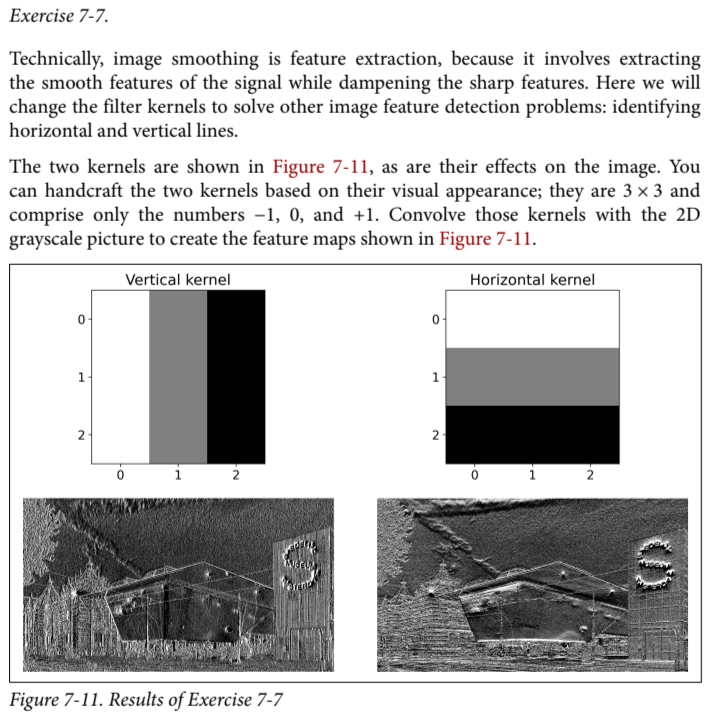

[[-0.53931176 -0.06834118 -0.01372902]
 [-0.84831373 -0.13276078 -0.0025298 ]
 [-0.91550902 -0.02213059 -0.12019176]] -1.9808807843137255 1.9149898039215687


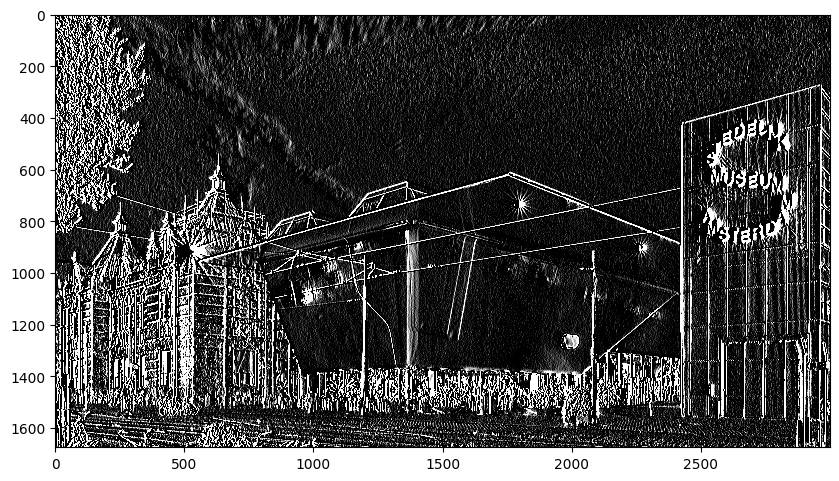

In [32]:
from skimage import io,color
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# transform image to 2D for convenience (not necessary for convolution!)
bathtub2d = color.rgb2gray(bathtub)

# convolution kernel
vkernel  = np.zeros((3,3))
vkernel[:,0] = 0
vkernel[:,1] = -1
vkernel[:,2] = 1

hkernel  = np.zeros((3,3))
hkernel[0,:] = 1
hkernel[1,:] = 0
hkernel[2,:] = -1

# initialize smoothed image
smooth_bathtub = np.zeros(bathtub2d.shape)

smooth_bathtub = signal.convolve2d(bathtub2d,vkernel,mode='same')

print(smooth_bathtub[0:3,0:3], np.min(smooth_bathtub), np.max(smooth_bathtub))

fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub, cmap = "gray", vmin=0,vmax=.01)
plt.show()